# **Calculating And Graphing The Term Structure Of Interest Rates**

## <span style="text-align:center;font-family:Franklin Gothic Medium', sans-serif;margin-top: 1.0em;margin-bottom: 0.5em;ont-style: italic;">Preparing the Notebook</span>


## <span style="text-align:center;font-family:Franklin Gothic Medium', sans-serif;margin-top: 1.0em;margin-bottom: 0.5em;ont-style: italic;">Importing libraries and functions</span>

</span>

<span style="margin-left: 1in;">

```
try:
    import numpy as np
except:
    !pip install numpy
    import numpy as np
try:
    import pandas as pd
except:
    !pip install pandas
    import pandas as pd
```

</span>

<br>

<span style="font-family: 'Garamond', serif;
    font-size: 16px;
    text-indent: 0.25in;
    line-height: 1.5;">
The following cell shows our completed code cell for imports.
</span>



<hr>

<span style="font-family: 'Garamond', serif;
          font-size: 10.5px;
          line-height: 1.3;">

$^{2}$ For more information on <font color='green'>try</font> and <font color='green'>except</font> statements, see "<a href='https://patrickjhess.github.io/Introduction-To-Python-For-Financial-Python/Control_Statements.html#the-try-and-except'>Control Statements</a>."
</span>

In [1]:
import os
import sys
import requests
from types import ModuleType
try:
    import numpy as np
except:
    !pip install numpy
    import numpy as np
try:
    import pandas as pd
except:
    !pip install pandas
    import pandas as pd

## <span style="text-align:center;font-family:Franklin Gothic Medium', sans-serif;margin-top: 1.0em;margin-bottom: 0.5em;ont-style: italic;">Adding a custom module and importing functions</span>

<span style="font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">

Now that we've imported our main modules and libraries, we'll access a custom module for our more specific functions. In the 'red'>below code, the custom module <font color='green'>module_basic_concepts_fixed_income</font> contains functions utilized by this notebook and others in the volume *Basic Concepts of Fixed Income*. This module is accessed from Dropbox using <font color='green'>requests.get()</font>.

You have the flexibility to choose the module name; in this instance, <font color='green'>module_basic_concepts_fixed_income</font> is assigned to <font color='green'>module_name</font>. Dropbox provides the URL for access. The module is instantiated with <font color='green'>ModuleType</font> (which we imported earlier) using the chosen <font color='green'>module_name</font>. Once created, the module becomes accessible in the Notebook's memory, though it is not added to a drive.

</span>

<span style="margin-left: 1in;">

```
url= 'https://www.dropbox.com/scl/fi/4y5hjxlfphh1ngvbgo77q/\
module_-basic_concepts_fixed_income.py?rlkey=6oxi7mgka42veaat79hcv8boz&st=stuou11h&dl=1'
module_name='module_basic_concepts_fixed_income'
try:
  response=requests.get(url)
  module=ModuleType(module_name)
```

</span><br>

<span style="font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
    
The <font color='green'>exec()</font> function below executes the Python code returned by <font color='green'>requests.get()</font>. It assigns functions and variables to <font color='green'>sys.module[module_name]</font>. This makes the module available for use in the Notebook.

</span>

<span style="margin-left: 1in;">

```
exec(response.text,module.__dict__)
sys.module[module_name]=module
```

</span><br>

<span style="font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
<big>We’ll then import the function <font color='green'>one_y_axis</font> from the module. The function plots calculation results and can be <a href='https://patrickjhess.github.io/Imported-Functions/one_y_axis.html#one-y-axis-is-a-helper-function-for-plotting-graphs-created-by-financial-python'>viewed here</a>.</big>
</span>

<span style="margin-left: 1in;">

```
from basic_concepts_fixed_income import(parent_folder_subfolder,
                                       one_y_axis)
```
 <br>

In [2]:
# Define the URL of the Python module to be downloaded from Dropbox.
# The 'dl=1' parameter in the URL forces a direct download of the file content.
url= 'https://www.dropbox.com/scl/fi/4y5hjxlfphh1ngvbgo77q/\
module_-basic_concepts_fixed_income.py?rlkey=6oxi7mgka42veaat79hcv8boz&st=stuou11h&dl=1'
module_name='basic_concepts_fixed_income'
# Send an HTTP GET request to the URL and store the server's response.
try:
  response=requests.get(url)
  # Raise an exception for bad status codes (like 404 Not Found)
  response.raise_for_status()
  module= ModuleType(module_name)
  #Code contained in response.text executed
  exec(response.text, module.__dict__)
  # Module added to sys
  sys.modules[module_name]=module
except requests.exceptions.RequestException as e:
    print(f"❌ Error: Could not fetch module from URL. {e}")
except Exception as e:
    print(f"❌ Error: Failed to execute or import the module. {e}")
# Open the local file in "write binary" ('wb') mode and save the downloaded content.
# Using a 'with' statement ensures the file is properly closed after writing.

# Now that 'basic_conepts_fixed_income' exists in the notebook, import the specific functions
from basic_concepts_fixed_income import(one_y_axis)

## <span style="text-align:center;font-family:Franklin Gothic Medium', sans-serif;margin-top: 1.0em;margin-bottom: 0.5em;ont-style: italic;">Term Structure: Putting NumPy and Pandas to Work</span>


<span style="font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
    
The *term structure of interest rates* (term structure) describes how interest rates vary over time. It's a critical financial metric reflected in the pricing or valuation of almost all assets.

NumPy and Pandas are powerful tools that greatly simplify the manipulation and calculation of extensive and complex financial data. In this section, we'll explore their application in calculating the term structure on various dates, a process that requires accessing large datasets and performing numerous calculations. These libraries will prove essential for this task.
</span>

## <span style="text-align:center;font-family:Franklin Gothic Medium', sans-serif;margin-top: 1.0em;margin-bottom: 0.5em;ont-style: italic;">Calculating term structure</span>


<span style="font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">

The earlier discussion of bond pricing described the price of a zero-coupon bond as its maturity value multiplied by the present-value factor. A NumPy array and a Pandas DataFrame included interest rates, future values, and present-value factors. These same concepts are used to calculate term structure.

</span>

### <span style="text-align:center;font-family:Franklin Gothic Medium', sans-serif;margin-top: 1.0em;margin-bottom: 0.5em;ont-style: italic;">Spot rates of interest</span>


<span style="font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">

Put simply, term structure is the relation between the annualized interest rates of zero-coupon bonds, or the *spot rate* of interest, and the bonds' maturities. The price of a zero-coupon bond with a maturity of $t$ and a principal of $1 is:

$$\Large P(t) = e^{ -r_t\times t}$$

The annualized continuously-compounded interest rate of the $t$-period zero-coupon bond is:

$$\Large r_t = \frac{-ln(P(t))}{t}$$
with $r_t$ representing the spot rate of interest for $t$ periods.

As such, if a zero-coupon bond pays $\$1$ in six months and has a price of $\$0.9753$, the spot rate of interest is:

$$5\% = \frac{-ln(0.9753)}{0.5}$$

The spot rate reflects a return that begins immediately for a specific period of time. To consider future periods, we turn to *forward rates*.
</span>


### <span style="text-align:center;font-family:Franklin Gothic Medium', sans-serif;margin-top: 1.0em;margin-bottom: 0.5em;ont-style: italic;">Forward rates of interest</span>



<span style="font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">

The forward rate of interest represents the additional return gained by extending an investment's duration&mdash;or the extra earnings from investing for two months instead of one, for example. When two bonds offer an identical single payment at maturity, the forward rate between the shorter and longer maturities is determined by the ratio of their respective prices.

For zero-coupon bonds with a principal of $\$1$, the calculation of one plus the forward rate between $t$ and $t+\Delta t$  is:


$$\Large\frac{\frac{1}{P(t+\Delta t)}}{\frac{1}{P(t)}}= e^{f(t,t+\Delta t)\times\Delta t}$$

simplified to

$$\large\frac{P(t)}{P(t+\Delta t)}= e^{f(t,t+\Delta t)\times\Delta t}$$

The continuously-compounded annualized forward rate between $t$ and $t+\Delta t$ is:



$$\large f(t,t+\Delta t) = \frac{ln(P(t)) - ln(P(t+\Delta t))}{\Delta t}$$

The forward rates can be locked in by purchasing a zero-coupon bond that matures in $\large t+\Delta t$ periods and for $t$ periods, borrowing $P(t+\Delta t)$ today at the rate $P(t)^{-1}.$ At $t$, the borrowing is repaid, and at $t +\Delta t$, the zero-coupon bond matures and pays $1. The borrowing, repayment, and locked-in rate-of-return calculations are shown below.

$$\large Amount\,Borrowed =P(t+\Delta t)$$
$$\large Repayment = P(t+\Delta t)\times\frac{1}{P(t)}$$
$$\large Locked\,In\,Rate\,of\,Return = \frac{1}{\frac{P(t+\Delta t)}{P(t)}}-1 =\frac{P(t)}{P(t+\Delta t)}-1$$

The continuously-compounded annualized locked-in rate of return equals:

$$\large\frac{ln(P(t)) -ln(P(t+\Delta t))}{\Delta t}$$

This value is the same as the continuously-compounded forward rate of interest between $t$ and  $\ t+\Delta t$.

Although it might seem obvious that the locked-in rate of return and the forward rate are equal, this result is significant. Imagine an investor who intends to invest at the future date $t$ for $\Delta t$ periods. The investor can

1.&nbsp; wait until $t$ to invest at the unknown spot rate $\ r(t,t+\Delta t)$, or

2.&nbsp; lock in a rate of return today that equals the current forward rate $\ f(t,t+\Delta t)$.

In a state of equilibrium, the prices of zero-coupon bonds ensure that investors are indifferent to either securing a spot rate immediately or deferring investment until a future, unknown spot rate. The choice between rolling over a short-term investment and making a long-term one essentially hinges on expectations for future interest rates. Similar to the odds in a sports wager, the forward rate represents a fair-bet value for these future unknown spot rates, thereby making investors indifferent to their investment duration. Although forward rates forecast future spot rates, the forecasts might not be the expected values.$^{8}$

</span>

<hr>

<span style="font-family: 'Garamond', serif;
          font-size: 10.5px;
          text-indent: 0.13in;
          line-height: 1.3;">

8.&nbsp; This statement presumes that future spot rates are uncertain. If future spot rates are known, forward rates will equal future spot rates.
</span>



## <span style="text-align:center;font-family:Franklin Gothic Medium', sans-serif;margin-top: 1.0em;margin-bottom: 0.5em;ont-style: italic;">Calculating the Term Structure of Interest Rates with Treasury Bills</span>


<span style="font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">

Treasury bills, or T-bills, mature in a year or less and make a single principal payment at maturity. In this section, we'll apply the Python concepts we've learned so far to T-bill data, using the bills to demonstrate the term structure between one month and one year. Because the bills make a single payment, their prices are determined by the single spot rate of interest at maturity.
</span>

## <span style="text-align:center;font-family:Franklin Gothic Medium', sans-serif;margin-top: 1.0em;margin-bottom: 0.5em;ont-style: italic;">Python and finance in action</span>


<span style="font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">

This example will outline two Python concepts integral to financial calculations. First, it will demonstrate how to leverage the Pandas library to access Excel workbooks from a URL and convert them into DataFrames&mdash;a highly effective skill given Excel's widespread use in the finance world. The Pandas method we'll use is <font color='green'>read_excel</font>.$^{9}$ Second, this example will illustrate the valuable data manipulation techniques available through Pandas, specifically focusing on how the attributes <font color='green'>loc</font> and <font color='green'>iloc</font> and the method <font color='green'>get_indexer</font> are used to retrieve the necessary data for calculations.$^{10}$

Measuring the term structure is a key financial skill. The term structure of interest rates is a critical indicator of financial market conditions. Its explanation, along with the concepts necessary for its calculation, represents the most significant aspect of this example. The relationships between past, present,and future market conditions are all expressed by measuring the term structure.

</span>

## <span style="text-align:center;font-family:Franklin Gothic Medium', sans-serif;margin-top: 1.0em;margin-bottom: 0.5em;ont-style: italic;">Getting T-bill data</span>


<span style="font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">

T-bill data is available from the US Department of the Treasury (Treasury) at the department's <a href='https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_bill_rates&field_tdr_date_value_month=202409'>Daily Treasury Bill Rate page</a>. The data used in this example is for September&nbsp;2022 and was uploaded to the authors' Dropbox as an Excel workbook.

</span>

### <span style="text-align:center;font-family:Franklin Gothic Medium', sans-serif;margin-top: 1.0em;margin-bottom: 0.5em;ont-style: italic;"> Accessing the data</span>


<span style="font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">

The Pandas magic used to read a an Excel workbook from a URL is <font color='green'>read_excel()</font>. The arguments of the method are:


1.&nbsp; The website address, or <font color='green'>url</font>. This argument is required.

2.&nbsp; The columns used as the index, or <font color='green'>index_col</font>. This argument is optional and is assigned to the <font color='green'>Date</font> column.

The below code assigns the Dropbox URL to <font color='green'>url</font> and sets <font color='green'>index_col</font> to <font color='green'>Date</font>, then passes both through our <font color='green'>read_excel()</font> method to give us <font color='green'>Tbill_data_excel</font>.
</span>

<div style="margin-left: 1in;">


```
url='https://www.dropbox.com/scl/fi/wdb24k0dddkpq7qry5sl8/\
daily-treasury-rates-9-22.xlsx?rlkey=qxoo8vpa4iziu5kvi27u6c41l&dl=1'
Tbill_data_excel=pd.read_excel(url, index_col='Date')
```
</div>

## <span style="text-align:center;font-family:Franklin Gothic Medium', sans-serif;margin-top: 1.0em;margin-bottom: 0.5em;ont-style: italic;">Creating a DataFrame from an Excel file</span>


<span style="font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">

Let's now turn this snippet into useable code. In the following code cell, an Excel workbook is accessed from Dropbox, which provides the URL. The Pandas method <font color='green'>read_excel()</font> is used to read and assign the data to <font color='green'>Tbill_data_excel</font>. The <font color='green'>Date</font> column is assigned as the index.  Notice here that <font color='green'>try</font> and <font color='green'>except</font> are used to alert us if the file is not available.

</span>

<hr>

<span style="font-family: 'Garamond', serif;
          font-size: 10.5px;
          text-indent: 0.13in;
          line-height: 1.3;">

9.&nbsp; More on Pandas methods and Excel files can be found at "<a href='https://patrickjhess.github.io/Introduction-To-Python-For-Financial-Python/An_Introduction_To_Pandas.html#dataframes-csv-and-excel-files'>A Quick Introduction To Pandas</a>".

10.&nbsp; <font color='green'>loc</font> and <font color='green'>iloc</font> are covered in greater depth in "<a href='https://patrickjhess.github.io/Introduction-To-Python-For-Financial-Python/An_Introduction_To_Pandas.html#the-loc-and-iloc-attributes'>A Quick Introduction To Pandas</a>."
</span>

In [3]:
#The full file path.
url='https://www.dropbox.com/scl/fi/wdb24k0dddkpq7qry5sl8/\
daily-treasury-rates-9-22.xlsx?rlkey=qxoo8vpa4iziu5kvi27u6c41l&dl=1'
print(f"Attempting to load data from: {url}")

#Load the data from Excel, using the Date column as the index.
try:
    Tbill_data_excel = pd.read_excel(url, index_col='Date')

    # Display the loaded DataFrame to verify it worked.
    display(Tbill_data_excel)

except FileNotFoundError:
    print("\nERROR: File not found.")
    print("Please check that the 'URL' address")

Attempting to load data from: https://www.dropbox.com/scl/fi/wdb24k0dddkpq7qry5sl8/daily-treasury-rates-9-22.xlsx?rlkey=qxoo8vpa4iziu5kvi27u6c41l&dl=1


,4 WEEKS BANK DISCOUNT,4 WEEKS COUPON EQUIVALENT,8 WEEKS BANK DISCOUNT,8 WEEKS COUPON EQUIVALENT,13 WEEKS BANK DISCOUNT,13 WEEKS COUPON EQUIVALENT,26 WEEKS BANK DISCOUNT,26 WEEKS COUPON EQUIVALENT,52 WEEKS BANK DISCOUNT,52 WEEKS COUPON EQUIVALENT
Date,,,,,,,,,,
2022-09-30,2.70,2.74,3.07,3.13,3.22,3.29,3.82,3.95,3.87,4.03
2022-09-29,2.68,2.72,3.08,3.14,3.26,3.33,3.78,3.91,3.80,3.96
2022-09-28,2.50,2.54,2.96,3.01,3.29,3.36,3.78,3.91,3.81,3.97
2022-09-27,2.60,2.64,2.99,3.05,3.26,3.33,3.83,3.96,3.97,4.14
2022-09-26,2.64,2.68,2.99,3.05,3.30,3.37,3.87,4.00,3.98,4.15
2022-09-23,2.59,2.63,2.95,3.00,3.12,3.19,3.76,3.88,3.97,4.14
2022-09-22,2.65,2.69,2.98,3.04,3.19,3.26,3.78,3.91,3.90,4.07
2022-09-21,2.46,2.50,2.89,2.94,3.21,3.28,3.77,3.90,3.90,4.07
2022-09-20,2.47,2.51,2.88,2.93,3.26,3.33,3.77,3.90,3.87,4.04


## <span style="text-align:center;font-family:Franklin Gothic Medium', sans-serif;margin-top: 1.0em;margin-bottom: 0.5em;ont-style: italic;">Accessing rows of a Pandas DataFrame</span>


<span style="font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">

We've now created a DataFrame, but we still need to access its contents. Three common ways of accessing the rows of a DataFrame are the attributes <font color='green'>loc</font> (as in "location") and <font color='green'>iloc</font> (as in "integer location") and the method <font color='green'>get_indexer()</font>. All three ways access rows by the value of the index.

The <font color='green'>loc</font> attribute of a DataFrame accesses a row by using its index value. In the below code, the specific value of the index "09/15/2022" is accessed. If the value is not in the index, an error is returned via <font color='green'>except</font>. There are only 30 days in September, so "09/31/2022" fails and the message "Value Not in Index" is displayed.

</span>

<span style="margin-left: 1in;">

```
try:
  display(Tbill_data_excel.loc['09/15/2022'])
except:
  display('Value Not in Index')
try:
  display(Tbill_data_excel.loc['09/31/2022'])
except:
  display('Value Not in Index')
```
</span>



<hr>

In [4]:
try:
  display(Tbill_data_excel.loc['09/15/2022'])
except:
  display('Value Not in Index')
try:
  display(Tbill_data_excel.loc['09/31/2022'])
except:
  display('Value Not in Index')

,4 WEEKS BANK DISCOUNT,4 WEEKS COUPON EQUIVALENT,8 WEEKS BANK DISCOUNT,8 WEEKS COUPON EQUIVALENT,13 WEEKS BANK DISCOUNT,13 WEEKS COUPON EQUIVALENT,26 WEEKS BANK DISCOUNT,26 WEEKS COUPON EQUIVALENT,52 WEEKS BANK DISCOUNT,52 WEEKS COUPON EQUIVALENT
Date,,,,,,,,,,
2022-09-15,2.68,2.72,2.92,2.97,3.12,3.19,3.69,3.81,3.83,4.0


'Value Not in Index'

<hr>

<span style="font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">

The <font color='green'>iloc</font> attribute accesses a row by its indexed integer value. In this case, the <font color='green'>Date</font> column "09/15/2022" has an index value of 11. If the integer value is not present, an error is returned, as in the earlier code. The DataFrame has 21 rows, and so the index value of 45 fails, as shown below.  
</span>

<span style="margin-left: 1in;">

```
try:
  display(Tbill_data_excel.iloc[11])
except:
  display('Value Not in Index')
try:
  display(Tbill_data_excel.loc[45'])
except:
  display('Value Not in Index')
```
</span>




<hr>

In [5]:
try:
  display(Tbill_data_excel.iloc[11])
except:
  display('Value Not in Index')
try:
  display(Tbill_data_excel.iloc[45])
except:
  display('Value Not in Index')

4 WEEKS BANK DISCOUNT         2.68
4 WEEKS COUPON EQUIVALENT     2.72
8 WEEKS BANK DISCOUNT         2.92
8 WEEKS COUPON EQUIVALENT     2.97
13 WEEKS BANK DISCOUNT        3.12
13 WEEKS COUPON EQUIVALENT    3.19
26 WEEKS BANK DISCOUNT        3.69
26 WEEKS COUPON EQUIVALENT    3.81
52 WEEKS BANK DISCOUNT        3.83
52 WEEKS COUPON EQUIVALENT    4.00
Name: 2022-09-15 00:00:00, dtype: float64

'Value Not in Index'

<hr>

<span style="font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
    
Rounding out our Pandas tools, the method <font color='green'>get_indexer()</font> returns the indexed integer values for a specific value of the index as an array. In the below example, an array with a single value is returned. For the Date "09/15/2022" the value 11 is returned. The <font color='green'>get_indexer()</font> method returns −1 for missing values, which avoids interrupting the code.
</span>


<span style="margin-left: 1in;">

```
displayT(bill_data_excel.index.get_indexer(['09/15/2022'])
displayT(bill_data_excel.index.get_indexer(['09/31/2022'])
```

</span>


<hr>

In [6]:
#return row number for date '09/15/2022'
display(Tbill_data_excel.index.get_indexer(['09/15/2022']))
#September has only 30 days, value of -1 returned
display(Tbill_data_excel.index.get_indexer(['09/31/2022']))

array([11])

array([-1])

## <span style="text-align:center;font-family:Franklin Gothic Medium', sans-serif;margin-top: 1.0em;margin-bottom: 0.5em;ont-style: italic;">Return To The Calculations</span>

<span style="font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">

Having gathered the bond data, we can return to calculating the term structure. Recall that the price of a T-bill (a zero-coupon bond) is its principal discounted back at the annualized continuous spot rate of interest. The forward rate of interest is the difference of the natural logs of the prices of a shorter maturity and a longer maturity zero-coupon bond. To calculate the term structure, we need to first calculate the prices of the T-bills (the zero-coupon prices).

</span>

## <span style="text-align:center;font-family:Franklin Gothic Medium', sans-serif;margin-top: 1.0em;margin-bottom: 0.5em;ont-style: italic;">Bank discounts and coupon equivalent yields</span>


<span style="font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">

T-bills are quoted as bank discounts or coupon-equivalent yields. T-bill prices are 100 less a bank discount annualized with a 360-day year.

$$\large Bill\,Price = 100 - bank\,discount\times\frac{Maturity\,In\,Days}{360}$$

The bank discount of the four-week bill on September 15th is 2.68%, which implies a bill price of:

$$99.792 = 100 - 2.68\times\frac{28}{360}$$

The coupon equivalent is the annualized rate of return that is calculated with the convention of *365 days* per year. The calculation is the actual rate of return (the gain on the bill divided by the bill price) multiplied by 365 divided by the maturity of the bill in days. A four-week bill matures in 28 days, and its coupon equivalent is:

$$Coupon\,Equivalent =\frac{100 - Bill\,Price}{Bill\,Price}\times\frac{365}{28}$$

And a coupon equivalent of:

$$2.72\% =\frac{100 - 99.792}{99.79}\times\frac{365}{28}$$
</span>

## <span style="text-align:center;font-family:Franklin Gothic Medium', sans-serif;margin-top: 1.0em;margin-bottom: 0.5em;ont-style: italic;">Calculating bond prices with bank discounts</span>


<span style="font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">

In the <font color='green'>Tbill_data_excel</font> DataFrame, columns are either *BANK DISCOUNT* or *COUPON EQUIVALENT*. We'll construct a NumPy array <font color='green'>bank_discount</font> from the *BANK DISCOUNT* columns. In the following code, the list <font color='green'>desired_columns</font> is created with list comprehension from the columns attribute of <font color='green'>Tbill_data_excel</font>. If the string 'BANK' is in the column name, that column name is added to the list <font color='green'>desired_columns.</font>$^{11}$

</span>

<span style="margin-left: 1in;">

```
desired_columns=[column for column in Tbill_data_excel.columns if 'BANK' in column]
```
</span><br>

<span style="font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">

The column is only added when the if statement is true. The <font color='green'>df_bankers_discount</font> DataFrame is created by including the <font color='green'>desired_column</font> lists as the columns of the <font color='green'>Tbill_data_excel</font> DataFrame, as shown below.
</span>

<span style="margin-left: 1in;">

```
df_bankers_discount=Tbill_data_excel[desired_columns]
display(df_bankers_discount[:5])
```

</span><br>

<span style="font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">

Having the bank discount in NumPy arrays will allow for an easy conversion to bill prices. We can convert <font color='green'>df_bankers_discount</font> into a two-dimensional NumPy array <font color='green'>bankers_discount</font> with the Pandas method <font color='green'>to_numpy()</font>. The first five rows of the array are shown below.$^{12}$

</span>

<span style="margin-left: 1in;">

```
bankers_discount=df_bankers_discount.to_numpy()
display(bankers_discount[:5])
```
</span><br>

<hr>

<span style="font-family: 'Garamond', serif;
          font-size: 10.5px;
          text-indent: 0.13in;
          line-height: 1.3;">

11.&nbsp; As shown here, the desired columns could be selected with a <font color='green'>for</font> loop:
</span>

<span style="margin-left: 1in;">

```
desired_columns=[]
for column in Tbill_data_site.columns:
  if 'BANK' in column:desired_columns.append(column)
```
</span>

<span style="font-family: 'Garamond', serif;
          font-size: 10.5px;
          text-indent: 0.13in;
          line-height: 1.3;">

For greater discussion of list comprehension as well as <font color='green'>for</font> loops, see "[A First Look at Lists](https://patrickjhess.github.io/Introduction-To-Python-For-Financial-Python/A_First_Look_At_Lists.html#create-a-list-by-iterating-through-a-string-list-comprehension-for-loop)."

12.&nbsp; See "[A Quick Introduction to Pandas](https://patrickjhess.github.io/Introduction-To-Python-For-Financial-Python/An_Introduction_To_Pandas.html#pandas-to-numpy)" for discussion of converting Pandas to NumPy.</span>


In [7]:
# Create a list called 'desired_columns' using a list comprehension.
desired_columns = [column for column in Tbill_data_excel.columns if 'BANK' in column]

# Create a DataFrame named 'df_bankers_discount' and 'bankers_discont'.
df_bankers_discount = Tbill_data_excel[desired_columns]
bankers_discount=df_bankers_discount.to_numpy()
# Display the first 5 rows of the newly created 'df_bankers_discount' DataFrame.
display(df_bankers_discount[:5])
display(bankers_discount[:5])

,4 WEEKS BANK DISCOUNT,8 WEEKS BANK DISCOUNT,13 WEEKS BANK DISCOUNT,26 WEEKS BANK DISCOUNT,52 WEEKS BANK DISCOUNT
Date,,,,,
2022-09-30,2.70,3.07,3.22,3.82,3.87
2022-09-29,2.68,3.08,3.26,3.78,3.80
2022-09-28,2.50,2.96,3.29,3.78,3.81
2022-09-27,2.60,2.99,3.26,3.83,3.97
2022-09-26,2.64,2.99,3.30,3.87,3.98


array([[2.7 , 3.07, 3.22, 3.82, 3.87],
       [2.68, 3.08, 3.26, 3.78, 3.8 ],
       [2.5 , 2.96, 3.29, 3.78, 3.81],
       [2.6 , 2.99, 3.26, 3.83, 3.97],
       [2.64, 2.99, 3.3 , 3.87, 3.98]])

### <span style="text-align:center;font-family:Franklin Gothic Medium', sans-serif;margin-top: 1.0em;margin-bottom: 0.5em;ont-style: italic;">Going from bankers' discounts to zero prices</span>

<span style="font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">

As noted earlier, the price of a bill with a $100 par value is:

$$\large Bill\,Price = 100 - bank\,discount\times\frac{Maturity\,In\,Days}{360}$$

The price of one dollar, or the the zero price, is:

$$\large\frac{100-bank\,discount\times\frac{Maturity\,In\,Days}{360}}{100}$$

The maturity of the bills are 4, 8, 13, 26, and 52 weeks. In the following code, the NumPy array <font color='green'>maturity_days</font> is created by multiplying the number of weeks by seven. The <font color='green'>zero_price_one</font> array is calculated by multiplying <font color='green'>bankers_discount</font> by <font color='green'>maturity_days</font>, annualized with 360 days per year. We then divide by 100 to convert the value to a percentage.
</span>


<hr>

In [8]:
maturity_days=np.array([4*7,8*7,13*7,26*7,52*7]) #Maturity in days calculated
#The price formula divides maturity days by 360 to annualize
#Then divides by to convert to a bill paying one dollar.
zero_prices_one=(100-bankers_discount*maturity_days/360)/100
#NumPy performs element by element calculations: a calculation for each
#value of maturity_days with the corresponding value of bankers_discount
zero_prices_one[:5]   #Display first 5 rows (each row is a trading day for Sept 2022)

array([[0.9979    , 0.99522444, 0.99186056, 0.98068778, 0.96087   ],
       [0.99791556, 0.99520889, 0.99175944, 0.98089   , 0.96157778],
       [0.99805556, 0.99539556, 0.99168361, 0.98089   , 0.96147667],
       [0.99797778, 0.99534889, 0.99175944, 0.98063722, 0.95985889],
       [0.99794667, 0.99534889, 0.99165833, 0.980435  , 0.95975778]])

<hr>

### <span style="text-align:center;font-family:Franklin Gothic Medium', sans-serif;margin-top: 1.0em;margin-bottom: 0.5em;ont-style: italic;">Spot rates</span>

<span style="font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">

Recall that the spot rates are the annualized rates calculated from the T-bill data. Spot rates are equal to:

$$\large Spot\ Rate(T) = \frac{ln(zero\ price)}{\frac{T}{365}}$$
where $T$ is the number of days. In the following code, the array <font color='green'>spot_rates</font> is calculated from the <font color='green'>zero_prices_one</font> array. The first five rows of the array are then displayed.

</span>



<hr>

In [9]:
spot_rates=-np.log(zero_prices_one)/(maturity_days/365) #Maturity_days divided by 365
spot_rates[:5] #Display first 5 rows (last 5 trading days of Sept 2022)

array([[0.02740378, 0.03120095, 0.03278081, 0.03910943, 0.04002581],
       [0.02720058, 0.03130283, 0.03318972, 0.03869593, 0.03928746],
       [0.0253719 , 0.03008042, 0.03349642, 0.03869593, 0.03939291],
       [0.0263878 , 0.030386  , 0.03318972, 0.03921282, 0.04108155],
       [0.02679418, 0.030386  , 0.03359866, 0.03962642, 0.04118718]])

<hr>

### <span style="text-align:center;font-family:Franklin Gothic Medium', sans-serif;margin-top: 1.0em;margin-bottom: 0.5em;ont-style: italic;">Forward rates</span>


<span style="font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">

The forward rates are calculated with differences in the natural logs of zero prices and assigned to the matrix <font color='green'>forward_rates</font> in the below code. The NumPy method <font color='green'>diff()</font> is used to calculate the difference between the zero prices for adjacent maturities. The arguments of <font color='green'>diff()</font> are the array name and the number of lags between differences. The default value for lags between differences is 1.

</span><br>

<span style="margin-left: 1in;">

```
forward_rates=-np.diff(np.log(zero_price_one))*365/np.diff(maturity_days)
```
</span><br>

<span style="font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">

The above line of code warrants a bit of explanation. The <font color='green'>diff()</font> method subtracts the lower indexed value from the higher&mdash;in this example, the maturity of four weeks from eight weeks and eight weeks from thirteen and so on. The calculation of forward rates is the reverse (or the negative) value of the <font color='green'>diff()</font> method. This negative value is assigned to the <font color='green'>forward_rates</font> array. The <font color='green'>diff()</font> function returns four values (there is no forward rate for the first month). To align the spot and forward rates on the graph, a dummy value, <font color='green'>nan</font>, is inserted in the forward-rate array. The NumPy method <font color='green'>insert()</font> is used to add a column with <font color='green'>nan</font> as the first column of the <font color='green'>forward_rates</font> array. As you might have guessed, <font color='green'>nan</font> stands for "not a number," and it's ignored in calculations. The arguments of <font color='green'>insert()</font> are the array, position, value, and axis. The rows are <font color='green'>axis 0</font>, and the columns are <font color='green'>axis 1</font>. This means that a position of 0 and an axis of 1 inserts the values as the first column.

</span><br>

<span style="margin-left: 1in;">

```
forward_rates=-np.insert(forward_rates,0,np.nan,axis=1)
```
</span><br>

<span style="font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">
    
The first five values of the <font color='green'>forward_rates</font> array are shown below.
</span>


In [10]:
forward_rates=-np.diff(np.log(zero_prices_one))*365/np.diff(maturity_days) #Sign switched
forward_rates=np.insert(forward_rates,0,np.nan,axis=1) #NumPy nan inserted for first month
forward_rates[:5] #Display first five dates

array([[       nan, 0.03499811, 0.03530859, 0.04543804, 0.0409422 ],
       [       nan, 0.03540507, 0.03620874, 0.04420214, 0.039879  ],
       [       nan, 0.03478894, 0.03896203, 0.04389543, 0.04008989],
       [       nan, 0.03438419, 0.03767567, 0.04523591, 0.04295028],
       [       nan, 0.03397781, 0.03873893, 0.04565418, 0.04274794]])

## Preparing the notebook

<span style="display:block; font-family: 'Garamond', serif;
    text-indent: 0.25in;
    line-height: 1.5;">
<big>We suggest saving files (graphs, spreadsheets, and so forth) generated by notebooks. To that end, a parameter of the <font color='green'>one_y_axis</font> function is the dictionary <font color='green'>save_config</font>. The keys of the dictionary are assumed to be:


*   <font color='green'>volume</font>
*   <font color='green'>chapter</font>
*   <font color='green'>file_name</font> </big></span>
<big>
If values are assigned to at least one of the keys, the graph will be saved.  If you change the name of the keys, the value will be ignored. In this example the dictionary is created with the constructor <font color='green'>dict</font> with the keys:$^{13,14}$

 </big>

<span style="display:block; font-family: 'Garamond', serif;
    text-indent: 1in;
    line-height: 1.5;">
<big><i>
<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
save_config=dict(file_name='Term Structure September 15 2022.pdf',
                 volume='Basic Concepts Fixed Income',
                 chapter= 'One')
```
</span></big>


---

<sup>13</sup>&nbsp;For background on Python dictionaries, see “[A Quick Introduction to Dictionaries](https://patrickjhess.github.io/Introduction-To-Python-For-Financial-Python/Dictionaries.html#an-introduction-to-dictionaries).”
</span>

$^{14}$ Dictionaries can be created with curly brackets- <font color='greem'>**{ }**</font>:
```
save_config={'file_name':'Term Structure September 15 2022.pdf',
                 'volume':'Basic Concepts Fixed Income',
                 'chapter': 'One'}
```

</i>


In [11]:
save_config=dict(file_name='Term Structure September 15 2022.pdf',
                 volume='Basic Concepts Fixed Income',
                 chapter= 'One')

## Graphing the spot and forward rates for September 15, 2022


<span style="display:block; font-family: 'Garamond', serif;
    text-indent: 0.25in;
    line-height: 1.5;">
<big>In the following code, the *x*-axis is set at the five maturities of the bills in months. Forward and spot rates are calculated for the month of September 2022, and the data for September 15, 2022, is plotted.</big>
</span>

<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
xaxis=['One','Two','Three','Six','Twelve']
string_date='09/15/2022'
```
</span>


<span style="display:block; font-family: 'Garamond', serif;
    text-indent: 0.25in;
    line-height: 1.5;">
<big>Since they lack index columns, the correct rows of the NumPy arrays <font color='green'>spot_rates</font> and <font color='green'>forward_rates</font> cannot be determined from the value of <font color='green'>string_date</font>. Because the rows of the arrays correspond to the rows of the DataFrame, the correct row is determined with our now familiar Pandas method <font color='green'>get_indexer()</font>. The method returns an array with index values corresponding to the argument. The spot- and forward-rate rows for September 15, 2022, are then multiplied by 100 and assigned to the list <font color='green'>data</font>.</big>
</span>


<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
loc=Tbill_data.index.get_indexer([string_date])[0]
data=[spot_rates[loc]*100,forward_rates[loc]*100]
```
</span>

<span style="display:block; font-family: 'Garamond', serif;
    text-indent: 0.25in;
    line-height: 1.5;">
<big>The plot title is assigned whatever value is assigned to <font color='green'>save_config['File Name']</font> (minus the PDF extension). If no title, it’s assigned “Add A Title.”</big>

</span>

<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
try:                    
  title = os.path.splitext(save_config['file_name'])              
except:
  title='Add A Title'
```
</span>

<span style="display:block; font-family: 'Garamond', serif;
    text-indent: 0.25in;
    line-height: 1.5;">
<big>Series names, labels, and markers are then assigned.</big>

</span>

<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
series = ['Spot Rate', 'Forward Rate']
ylabel = 'Continuous Compounded Annualized % Rates'
xlabel = 'Maturity In Months'
x = len(data)
markers = ['<','>']*round(x/2+x%2+0.001)
```

</span>

<span style="display:block; font-family: 'Garamond', serif;
    text-indent: 0.25in;
    line-height: 1.5;">
<big>The upper limit of the *y*-axis is assigned to <font color='green'>upper</font> and calculated from the maximum value of the spot and forward rates. The NumPy method <font color='green'>nanmax()</font> ignores <font color='green'>nan</font> values. The maximum of <font color='green'>nanmax()</font> of spot rates (<font color='green'>data[0]</font>) and forward rates (<font color='green'>data[1]</font>) plus 0.5% are assigned to <font color='green'>upper </font>. The lower limit is set to 0, and the size and colors of the lines are set as 10 inches wide and six inches tall (10,6) and red and blue, respectively.</big></span>


<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
lower = 0
upper = max(np.nanmax(data[0]), np.nanmax(data[1])) + 0.5
ylim = [lower, upper]
size = (10, 6)  
colors=['r','b']
```
</span>

<span style="display:block; font-family: 'Garamond', serif;
    text-indent: 0.25in;
    line-height: 1.5;">
<big>Finally, the graph is generated and saved with <font color='green'>one_y_axis()</font>.</big>

</span>


<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
one_y_axis(xaxis, data, title, series, xlabel, ylabel, markers, size, ylim,
           save_config=save_config,colors=colors)
```
</span>

StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

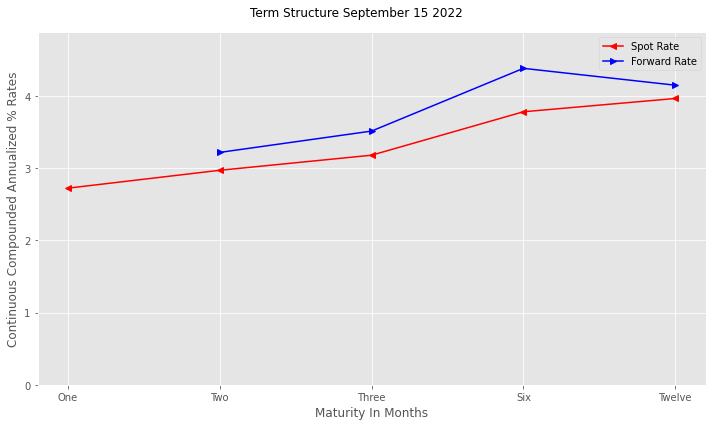

In [12]:
save_config=dict(file_name='Term Structure September 15 2022.pdf',
                 volume='Basic Concepts Fixed Income',
                 chapter= 'One')
# Define the labels for the x-axis, representing different maturities.
xaxis = ['One', 'Two', 'Three', 'Six', 'Twelve']

# Define the specific date for which the term structure will be plotted.
string_date = '09/15/2022'

# Get the integer location (row index) of the specified 'string_date' in the DataFrame's index..
loc = Tbill_data_excel.index.get_indexer([string_date])[0]

# Prepare the data to be plotted on the y-axis (as %).
data = [spot_rates[loc]*100, forward_rates[loc]*100]

# Attempt to extract the plot title from the file name.
try:
    title = os.path.splitext(save_config['file_name'])[0]
#'file_name key not found set a default title.
except:
    title = 'September 15, 2022'

# Define the names for the data series that will appear in the plot's legend.
series = ['Spot Rate', 'Forward Rate']

# Define the label for the y-axis.
ylabel = 'Continuous Compounded Annualized % Rates'

# Define the label for the x-axis.
xlabel = 'Maturity In Months'

#'data' contains two series (spot and forward rates).
x = len(data)

# Define markers for the plot.
markers = ['<','>']*round(x/2+x%2+0.001)

# Define the lower bound for the y-axis.
lower = 0

# Define the upper bound for the y-axis.
# considering NaN values (not a number) and adds a small buffer (0.5) for padding.
upper = max(np.nanmax(data[0]), np.nanmax(data[1])) + 0.5

# Define the y-axis limits (minimum and maximum values).
ylim = [lower, upper]

# Define the size of the plot (width, height) in inches.
size = (10, 6)
# Define colors as red and blue
colors=['r','b']
# This function generates and possibly saves a plot.
one_y_axis(xaxis, data, title, series, xlabel, ylabel, markers, size, ylim,
           save_config=save_config,colors=colors)

## <span style="text-align:center;font-family:Franklin Gothic Medium', sans-serif;margin-top: 1.0em;margin-bottom: 0.5em;ont-style: italic;">Accessing T-Bill Data Directly from the Treasury</span>

<span style="font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">

**Figure 1** shows a screenshot of the Treasury page and its data tool, [found here](https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_bill_rates). The time period selected determines the URL for the "Download CSV" link. In our example, the year is set to 2025 and the month is September. As we will see below, the URL includes the string of a four-digit year and a two-digit month ('202509').

</span>




#### The link to the [Daily Treasury Bill Rates on the Treasury Site](https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_bill_rates)
<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Figure 1. Accessing T-bill rates**

<img  src='https://docs.google.com/drawings/d/e/2PACX-1vTiHivEYXBe1dqoYji4_KM859JuQ5eyt5zeOOq59grAnhoJFY-Cg-7q610W0YZvPJ9cL7Vi22uC-5me/pub?w=960&h=720'><img>
Source: "Daily Treasury Bill Rates," US Department of the Treasury, 2025 (accessed Sept. 24, 2025)



## <span style="text-align:center;font-family:Franklin Gothic Medium', sans-serif;margin-top: 1.0em;margin-bottom: 0.5em;ont-style: italic;">Changing the URL and using the Pandas method <font color='green'>read_csv</font></span>

<span style="font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">

 The data is accessed directly from the Treasury as a CSV file, and the code below displays the data row for September 30, 2025. With the exception of the URL value and the <font color='green'>read_csv()</font> versus <font color='green'>read_excel()</font> methods, the code is identical to what we used to create <font color='green'>Tbill_data_excel</font>. In this example, the URL points to a Treasury site instead of Dropbox. The URL is copied by right-clicking the "Download CSV" link on the Treasury site. The URL for a particular year and month is shown below, and <font color='green'>data_date</font> is assigned the string '202509'. You can assign it any year and month after 2022.$^{14}$
</span>

<span style="margin-left: 1in;">

```
data_date='202509'
url='https://home.treasury.gov/resource-center/data-chart-center/\
interest-rates/daily-treasury-rates.csv/all/'+data_date+'?\
type=daily_treasury_bill_rates&field_tdr_date_value_month=+'data_date'+&page&_format=csv'
```
</span><br>

<span style="font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">

The CSV file is in descending order of the dates. The first row is for September 30th and is displayed with <font color='green'>iloc[0]</font>.

</span>

<hr>

<span style="font-family: 'Garamond', serif;
          font-size: 10.5px;
          text-indent: 0.13in;
          line-height: 1.3;">

14.&nbsp;As of November 3, 2025, dates prior to 2022 will be moved to a historical page, according to the Treasury. [See U.S. Treasury Site.](https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_bill_rates&field_tdr_date_value=2025)
</span>


In [13]:
#Read the csv file from the U.S. Treasury website
#Construct the full file path.
data_date='202509'
url='https://home.treasury.gov/resource-center/data-chart-center/\
interest-rates/daily-treasury-rates.csv/all/'+data_date+'?\
type=daily_treasury_bill_rates&field_tdr_date_value_month='+data_date+'&page&_format=csv'
print(f"Attempting to load data from {url}")

#Load the data from csv, using the Date column as the index.
try:
    Tbill_data_site = pd.read_csv(url,index_col='Date')
    # display September 30, 2025 data
    display(Tbill_data_site.iloc[0])

except FileNotFoundError:
    display("\nERROR: File not found.")
    display("Please check that the 'URL' address")

Attempting to load data from https://home.treasury.gov/resource-center/data-chart-center/interest-rates/daily-treasury-rates.csv/all/202509?type=daily_treasury_bill_rates&field_tdr_date_value_month=202509&page&_format=csv


,09/30/2025
4 WEEKS BANK DISCOUNT,4.05
4 WEEKS COUPON EQUIVALENT,4.12
6 WEEKS BANK DISCOUNT,4.02
6 WEEKS COUPON EQUIVALENT,4.10
8 WEEKS BANK DISCOUNT,4.00
8 WEEKS COUPON EQUIVALENT,4.08
13 WEEKS BANK DISCOUNT,3.86
13 WEEKS COUPON EQUIVALENT,3.95
17 WEEKS BANK DISCOUNT,3.83
17 WEEKS COUPON EQUIVALENT,3.93


## <font color='green'>***Application: Downloading Treasury Data***</font>

<span style="display:block;background-color:LightGray;
    border-left: 12px solid green;
    font-family: 'Garamond', serif;
    line-height: 1.5;
    padding: 15px">
    <br>
Access the T-bill data for September 2024 from the US Treasury and display the values for September 12, 2024. For hints, see [Chapter One Hints: Download US Treasury Data September 2024](https://patrickjhess.github.io/Hints-Results/Chapter_One_Hints.html#download-data-for-september-2024-from-the-u-s-treasury-and-display-the-values-for-september-12-2024), and for expected results, see [Chapter One expected Results: Download US Treasury Data September 2024](https://patrickjhess.github.io/Hints-Results/Chapter_One_Results.html#download-data-for-september-2024-from-the-u-s-treasury-and-display-the-values-for-september-12-2024).
<br>
<br>
</span>


## <span style="text-align:center;font-family:Franklin Gothic Medium', sans-serif;margin-top: 1.0em;margin-bottom: 0.5em;ont-style: italic;">Using the CSV file to calculate term structure</span>

<span style="font-family: 'Garamond', serif;
    font-size: 14px;
    text-indent: 0.25in;
    line-height: 1.5;">

The following sections proceed much the same as our earlier process for calculating the term structure and thus need little explanation. We'll convert banks' discounts to zero prices, calculate spot and forward rates, and prepare the Notebook for graphing the term structure.
</span>


In [14]:
# Create a list called 'desired_columns' using a list comprehension.
desired_columns = [column for column in Tbill_data_site.columns if 'BANK' in column]

# Create a DataFrame named 'df_bankers_discount'.
df_bankers_discount = Tbill_data_site[desired_columns]

# Display the first 5 rows of the newly created 'df_bankers_discount' DataFrame.
df_bankers_discount[:5]

,4 WEEKS BANK DISCOUNT,6 WEEKS BANK DISCOUNT,8 WEEKS BANK DISCOUNT,13 WEEKS BANK DISCOUNT,17 WEEKS BANK DISCOUNT,26 WEEKS BANK DISCOUNT,52 WEEKS BANK DISCOUNT
Date,,,,,,,
09/30/2025,4.05,4.02,4.00,3.86,3.83,3.72,3.53
09/29/2025,4.06,4.03,4.00,3.86,3.83,3.73,3.52
09/26/2025,4.07,4.03,4.00,3.87,3.83,3.74,3.53
09/25/2025,4.08,4.03,4.01,3.89,3.84,3.75,3.54
09/24/2025,4.02,4.02,3.98,3.87,3.81,3.72,3.49


In [15]:
# The .to_numpy() method strips away the pandas Index and column headers,
# leaving only the raw data values in a highly efficient array format.
bankers_discount=df_bankers_discount.to_numpy()

# --- Verification Step: Display the First 5 Rows of the New Array ---
# After a data type conversion, it is good practice to inspect the result.
bankers_discount[:5]

array([[4.05, 4.02, 4.  , 3.86, 3.83, 3.72, 3.53],
       [4.06, 4.03, 4.  , 3.86, 3.83, 3.73, 3.52],
       [4.07, 4.03, 4.  , 3.87, 3.83, 3.74, 3.53],
       [4.08, 4.03, 4.01, 3.89, 3.84, 3.75, 3.54],
       [4.02, 4.02, 3.98, 3.87, 3.81, 3.72, 3.49]])

### <span style="text-align:center;font-family:Franklin Gothic Medium', sans-serif;margin-top: 1.0em;margin-bottom: 0.5em;ont-style: italic;">Going from bankers' discounts to zero prices</span>



In [16]:
maturity_days=np.array([4*7,6*7,8*7,13*7,17*7,26*7,52*7]) #Maturity in days calculated
#The price formula divides maturity days by 360 to annualize
#Then divides by 100 to convert to a bill paying one dollar.
zero_prices_one=(100-bankers_discount*maturity_days/360)/100
#NumPy performs element by element calculations: a calculation for each
#value of maturity_days with the corresponding value of bankers_discount
zero_prices_one[:5]   #Display first 5 rows (each row is a trading day for Sept 2025)

array([[0.99685   , 0.99531   , 0.99377778, 0.99024278, 0.98733972,
        0.98119333, 0.96430778],
       [0.99684222, 0.99529833, 0.99377778, 0.99024278, 0.98733972,
        0.98114278, 0.96440889],
       [0.99683444, 0.99529833, 0.99377778, 0.9902175 , 0.98733972,
        0.98109222, 0.96430778],
       [0.99682667, 0.99529833, 0.99376222, 0.99016694, 0.98730667,
        0.98104167, 0.96420667],
       [0.99687333, 0.99531   , 0.99380889, 0.9902175 , 0.98740583,
        0.98119333, 0.96471222]])

### <span style="text-align:center;font-family:Franklin Gothic Medium', sans-serif;margin-top: 1.0em;margin-bottom: 0.5em;ont-style: italic;">Spot Rates</span>



In [17]:
spot_rates=-np.log(zero_prices_one)/(maturity_days/365) #Maturity_days divided by 365
spot_rates[:5] #Display first 5 rows (last 5 trading days of Sept 2025)

array([[0.04112731, 0.04085421, 0.04068225, 0.03932829, 0.03907985,
        0.03807584, 0.03644461],
       [0.04122902, 0.04095608, 0.04068225, 0.03932829, 0.03907985,
        0.03817917, 0.03633948],
       [0.04133073, 0.04095608, 0.04068225, 0.03943068, 0.03907985,
        0.03828251, 0.03644461],
       [0.04143244, 0.04095608, 0.04078428, 0.03963547, 0.03918254,
        0.03838586, 0.03654976],
       [0.04082219, 0.04085421, 0.04047821, 0.03943068, 0.03887448,
        0.03807584, 0.03602413]])

### <span style="text-align:center;font-family:Franklin Gothic Medium', sans-serif;margin-top: 1.0em;margin-bottom: 0.5em;ont-style: italic;">Forward Rates</span>



In [18]:
forward_rates=-np.diff(np.log(zero_prices_one))*365/np.diff(maturity_days) #Sign switched
forward_rates=np.insert(forward_rates,0,np.nan,axis=1) #NumPy nan inserted for first month
forward_rates[:5]

array([[       nan, 0.04030802, 0.04016638, 0.03716195, 0.03827242,
        0.03617937, 0.03481338],
       [       nan, 0.0404102 , 0.03986078, 0.03716195, 0.03827242,
        0.0364779 , 0.03449978],
       [       nan, 0.04020678, 0.03986078, 0.03742816, 0.03793965,
        0.03677644, 0.03460671],
       [       nan, 0.04000335, 0.04026888, 0.03779737, 0.03771053,
        0.03688102, 0.03471366],
       [       nan, 0.04091826, 0.03935021, 0.03775464, 0.03706682,
        0.0365673 , 0.03397243]])


# Graphing the Term Structure (Again)






In [19]:
save_config=dict(file_name='Term Structure September 30 2025.pdf',
                 volume='Basic Concepts Fixed Income',
                 chapter= 'One')

## Graphing the spot and forward rates for September 30, 2025

<span style="display:block;
    font-family: 'Garamond', serif;
    text-indent: 0.25in;
    line-height: 1.5;">
<big>Recall that the September 2022 T-bill data had five maturity dates. The September 2025 data has two additional dates: <font color='green'>'6 WEEKS'</font> and <font color='green'>'17 WEEKS'</font>. In the following code, the *x*-axis is set at the bills’ seven maturities in months. Forward and spot rates are calculated for the month of September 2025, and the data for September 30, 2025, is plotted.</big>
</span>

<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
xaxis=['One','One & Half','Two','Three','Four','Six','Twelve']
string_date='09/15/2022'
```
</span>

<span style="display:block;
    font-family: 'Garamond', serif;
    text-indent: 0.25in;
    line-height: 1.5;">
<big>The first row of <font color='green'>spot_rates</font> and <font color='green'>forward_rates</font> correspond to September 30. The spot- and forward-rate rows for September 30, 2025, are then multiplied by 100 and assigned to the list <font color='green'>data</font>.</big>
</span>

<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
data=[spot_rates[0]*100,forward_rates[0]*100]
```

</span>

<span style="display:block;
    font-family: 'Garamond', serif;
    text-indent: 0.25in;
    line-height: 1.5;">
<big>The plot title is assigned whatever value is assigned to <font color='green'>save_config['File Name']</font> (minus the PDF extension).</big>
</span>

<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
try:                    
  title = os.path.splitext(save_config['file_name'])              
except:
  title='September 30, 2025'
```

</span>

<span style="display:block;
    font-family: 'Garamond', serif;
    text-indent: 0.25in;
    line-height: 1.5;">
<big>Series names, labels, and markers are then assigned.</big>
</span>

<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
series = ['Spot Rate', 'Forward Rate']
ylabel = 'Continuous Compounded Annualized % Rates'
xlabel = 'Maturity In Months'
x = len(data)
markers = ['<','>']*round(x/2+x%2+0.001)
```

</span>

<span style="display:block;
    font-family: 'Garamond', serif;
    text-indent: 0.25in;
    line-height: 1.5;">
<big>The upper limit of the *y*-axis is assigned to <font color='green'>upper</font> and calculated from the maximum value of the spot and forward rates. As before, the NumPy method <font color='green'>nanmax()</font> ignores <font color='green'>nan</font> values. The maximum of <font color='green'>nanmax()</font> of spot rates (<font color='green'>data[0]</font>) and forward rates (<font color='green'>data[1]</font>) plus 0.5% are assigned to <font color='green'>upper </font>. The lower limit is set to 0, and the size and colors of the lines are once again set as 10 inches wide and 6 inches tall (10,6) and red and blue, respectively.</big>
</span>

<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
lower = 0
upper = max(np.nanmax(data[0]), np.nanmax(data[1])) + 0.5
ylim = [lower, upper]
size = (10, 6)
colors=['r','b']
```

</span>

<span style="display:block;
    font-family: 'Garamond', serif;
    text-indent: 0.25in;
    line-height: 1.5;">
<big>Finally, the graph is generated and saved with <font color='green'>one_y_axis()</font>.</big>
</span>

<span style="display:block; margin-left: 1in;margin-bottom: .2in;">

```
one_y_axis(xaxis, data, title, series, xlabel, ylabel, markers, size, ylim,
           save_config=save_config,colors=colors)
```

</span>

❓ Do you want to save the file? (y/n) (press enter for n): y


###***⌛ Generating A Path***

### ⚠️ **Drive Mount Failed:** Error: credential propagation was unsuccessful. Saving to temporary '/content' folder.

### ✅ **File Path Generated:**
`/content/Basic Concepts Fixed Income/One/Term Structure September 30 2025.pdf`

### ⚠️ *File is in a temporary location and will be lost on runtime restart.*

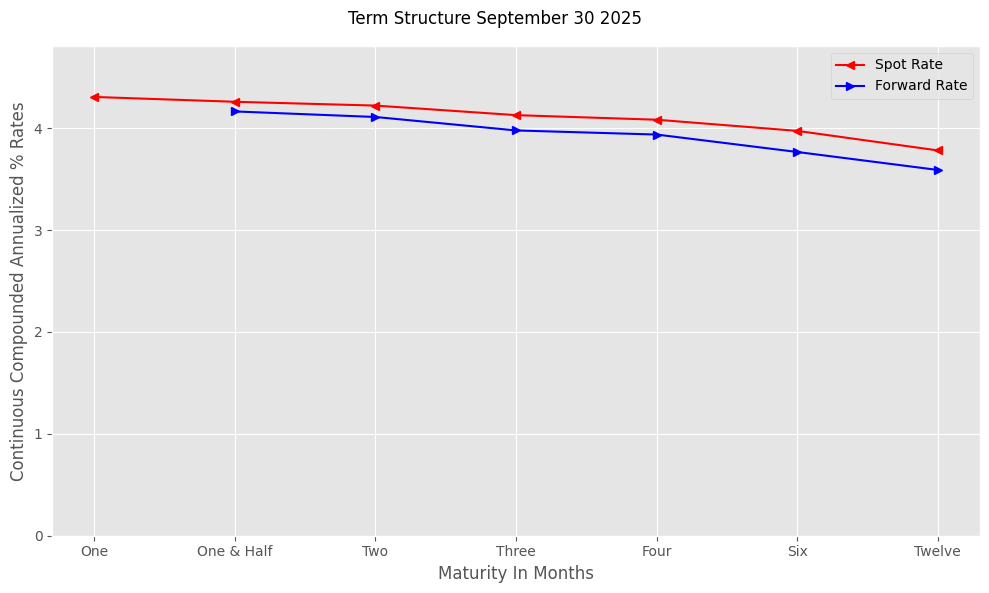

In [20]:
# Define the labels for the x-axis, representing different maturities.
xaxis = ['One','One & Half', 'Two', 'Three','Four', 'Six', 'Twelve']

# Define the specific date for which the term structure will be plotted.
string_date = '09/30/2025'

# Get the integer location (row index) of the specified 'string_date' in the DataFrame's index..
loc = Tbill_data_excel.index.get_indexer([string_date])[0]

# Prepare the data to be plotted on the y-axis (as %).
data = [spot_rates[loc]*100, forward_rates[loc]*100]

# Attempt to extract the plot title from the file name.
try:
    title = os.path.splitext(save_config['file_name'])[0]
#'file_name key not found set a default title.
except:
    title = 'September 30, 2025'

# Define the names for the data series that will appear in the plot's legend.
series = ['Spot Rate', 'Forward Rate']

# Define the label for the y-axis.
ylabel = 'Continuous Compounded Annualized % Rates'

# Define the label for the x-axis.
xlabel = 'Maturity In Months'

#'data' contains two series (spot and forward rates).
x = len(data)

# Define markers for the plot.
markers = ['<','>']*round(x/2+x%2+0.001)

# Define the lower bound for the y-axis.
lower = 0

# Define the upper bound for the y-axis.
# considering NaN values (not a number) and adds a small buffer (0.5) for padding.
upper = max(np.nanmax(data[0]), np.nanmax(data[1])) + 0.5

# Define the y-axis limits (minimum and maximum values).
ylim = [lower, upper]

# Define the size of the plot (width, height) in inches.
size = (10, 6)
# Define colors as red and blue
colors=['r','b']
# This function generates and possibly saves a plot.
one_y_axis(xaxis, data, title, series, xlabel, ylabel, markers, size, ylim,
           save_config=save_config,colors=colors)

# <span style="text-align: left; color:green; font-family: 'Franklin Gothic Medium', sans-serif; margin-top: 1.0em; margin-bottom: 0em; font-style: italic;">Chapter Exercise</span>
<span style="text-align: left; color:green; font-family: 'Franklin Gothic Medium', sans-serif; margin-top: 0; margin-bottom: 0.5em; font-style: italic;"><big>Calculating and Plotting Spot and Forward Rates</big></span>

<span style="display:block;
    border-left: 12px solid green;
    font-family: 'Garamond', serif;
    line-height: 1.5;
    padding: 15px">
<big>Using the data from September 12, 2024:</big><br></span>
<span style="display:block;
    border-left: 12px solid green;
    font-family: 'Garamond', serif;
    line-height: 2;">
<br><big>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;Calculate spot and forward rates.<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;Plot the spot and forward rates.</big><br></span>
<span style="display:block;
    border-left: 12px solid green;
    font-family: 'Garamond', serif;
    line-height: 1.5;
    padding: 15px">
<br><big>For hints, see [Chapter One Hints](https://patrickjhess.github.io/Hints-Results/Chapter_One_Hints.html#chapter-one-exercise). For expected results, see [Chapter One Expected Results](https://patrickjhess.github.io/Hints-Results/Chapter_One_Results.html#chapter-one-exercise).</big>

</span>